<a href="https://colab.research.google.com/github/Imshubhham/Imshubham/blob/main/MNIST_Classification_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
X_test.shape

(10000, 28, 28)

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

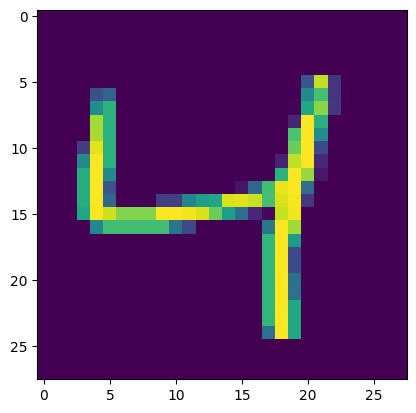

In [5]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [6]:
X_train = X_train/255
X_test = X_test/255

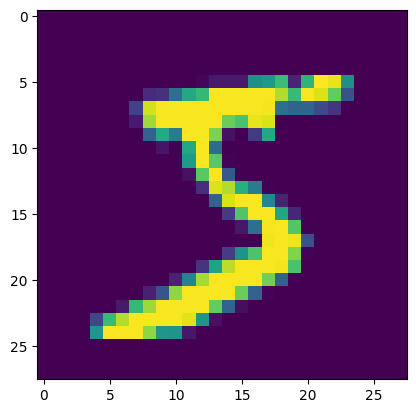

In [19]:
plt.imshow(X_train[0])

In [8]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))

model.add(Dense(10,activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [11]:
history = model.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 19s 8ms/step - loss: 0.3785 - accuracy: 0.8928 - val_loss: 0.2253 - val_accuracy: 0.9329
Epoch 2/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1900 - accuracy: 0.9443 - val_loss: 0.1684 - val_accuracy: 0.9514
Epoch 3/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1463 - accuracy: 0.9566 - val_loss: 0.1529 - val_accuracy: 0.9548
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1204 - accuracy: 0.9646 - val_loss: 0.1346 - val_accuracy: 0.9604
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1037 - accuracy: 0.9675 - val_loss: 0.1269 - val_accuracy: 0.9624
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0906 - accuracy: 0.9721 - val_loss: 0.1203 - val_accuracy: 0.9649
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0818 - accuracy: 0.9743 - val_loss: 0.1271 - val_accuracy

In [12]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [13]:
y_pred = y_prob.argmax(axis=1)

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.966

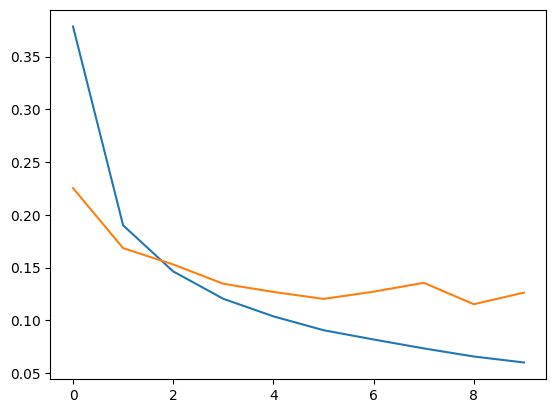

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

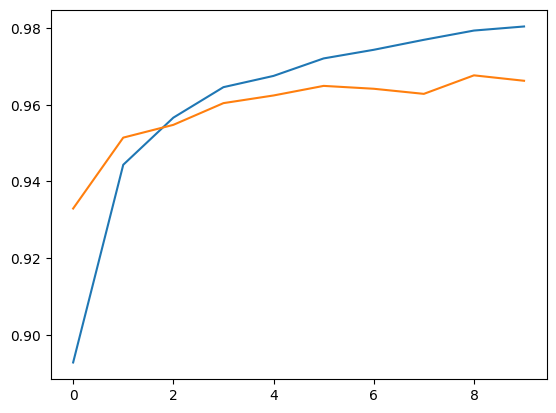

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

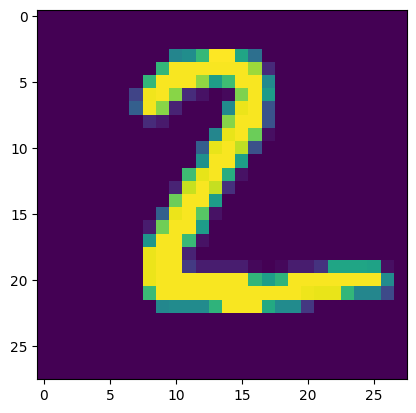

In [17]:
plt.imshow(X_test[1])

In [18]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 27ms/step


array([2])